In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
user = pd.read_pickle('users_final.pkl')

In [28]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47492 entries, 0 to 51383
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   isbn             47492 non-null  object
 1   rank_mean        47492 non-null  object
 2   rank_percentage  47492 non-null  object
 3   review_title     47492 non-null  object
 4   review_id        47492 non-null  object
 5   review_rank      47492 non-null  object
 6   review_text      47492 non-null  object
dtypes: object(7)
memory usage: 2.9+ MB


In [29]:
user.isbn.duplicated().sum()

0

In [30]:
user.columns

Index(['isbn', 'rank_mean', 'rank_percentage', 'review_title', 'review_id',
       'review_rank', 'review_text'],
      dtype='object')

In [3]:
re = pd.read_pickle('recommend_cat_new.pkl')
re.head(2)

,isbn,title,categoryName,salesPoint,adult,rank,genres,mood,interest
198,9791165341909,달러구트 꿈 백화점 (50만 부 기념 드림 에디션) - 주문하신 꿈은 매진입니다,소설,379054,False,8,"[역사, 동화, 로맨스, 미스터리, 판타지, 무협]","[행복, 위로]","[일기, 동물, 사랑, 생각, 진로, 설득]"
559,9791161571188,불편한 편의점 (40만부 기념 벚꽃 에디션),소설,330837,False,10,"[시대, 동화]","[위로, 힐링, 행복]","[시간, 심리, 관계, 사랑, 생각]"


In [4]:
re = pd.merge(re, user,how = 'left', on = 'isbn')
re.head(2)

,isbn,title,categoryName,salesPoint,adult,rank,genres,mood,interest,rank_mean,rank_percentage,review_title,review_id,review_rank,review_text
0,9791165341909,달러구트 꿈 백화점 (50만 부 기념 드림 에디션) - 주문하신 꿈은 매진입니다,소설,379054,False,8,"[역사, 동화, 로맨스, 미스터리, 판타지, 무협]","[행복, 위로]","[일기, 동물, 사랑, 생각, 진로, 설득]",[9.2],"[78%, 17%, 3%, 1%, 1%]","[달러구트 꿈 백화점_ 당신은 오늘 어떤 꿈을 꾸고 싶나요?, 마케팅의 승리책., ...","[2****a, s*****y, g*******7, g*******g, 이****이...","[5점, 1점, 1점, 4점, 1점, 1점, 2점, 4점, 4점, 2점]",[\n\n \n \n \n \n꿈을 꿀 수 있다는 건 행복한 거야!\n따뜻하고 감동...
1,9791161571188,불편한 편의점 (40만부 기념 벚꽃 에디션),소설,330837,False,10,"[시대, 동화]","[위로, 힐링, 행복]","[시간, 심리, 관계, 사랑, 생각]",[9.2],"[74%, 20%, 5%, 1%, 1%]","[불편한 편의점, 불편하지만 자꾸 가고 싶은 편의점, 따듯한 편의점, 우리의 또다른...","[부***주, g*******g, n***8, J*y, 꿈*******자, 해**이...","[4점, 5점, 4점, 4점, 4점, 5점, 5점, 1점, 5점, 5점]",[\n이상하다가 좋아진 기분나미야잡화점의 기적을 조금 떠올리게 만드는 작품아들이 팔...


In [40]:
re.tail(2)

,isbn,title,categoryName,salesPoint,adult,rank,genres,mood,interest,rank_mean,rank_percentage,review_title,review_id,review_rank,review_text
54372,9791188519354,서번트 리더의 품격,자기계발,0,False,0,[],"[행복, 도전, 열망]","[리더십, 생각, 성공, 인생]",[],[],[],[],[],[]
54373,9791190710350,오만과 편견,소설,0,False,0,"[시대, 동화]","[도전, 열정, 행복]","[사랑, 심리, 인간, 인생, 청춘, 관계, 페미니즘, 생각, 일상]",[10.0],"[100%, 0%, 0%, 0%, 0%]",[오만과 편견],[할**장],[5점],[\n\n \n오만과 편견은 1813년 출판된 이래 한국에도 여러 출판사를 통해 번...


In [5]:
re_user = re[['isbn','title','review_id', 'review_rank']]
re_user

,isbn,title,review_id,review_rank
0,9791165341909,달러구트 꿈 백화점 (50만 부 기념 드림 에디션) - 주문하신 꿈은 매진입니다,"[2****a, s*****y, g*******7, g*******g, 이****이...","[5점, 1점, 1점, 4점, 1점, 1점, 2점, 4점, 4점, 2점]"
1,9791161571188,불편한 편의점 (40만부 기념 벚꽃 에디션),"[부***주, g*******g, n***8, J*y, 꿈*******자, 해**이...","[4점, 5점, 4점, 4점, 4점, 5점, 5점, 1점, 5점, 5점]"
2,9791192186313,시맨틱 에러 포토에세이,[야*마],[5점]
3,9788954681179,밝은 밤 (별밤 에디션),"[별*, 엠*이, 달**러, 블*, 꼼*, 코*, 건****탕, 자*련, 큰*, c...","[5점, 4점, 5점, 5점, 4점, 5점, 5점, 4점, 5점, 5점]"
4,9791165343729,달러구트 꿈 백화점 2 - 단골손님을 찾습니다,"[우*니, 삶**소, 사*님, J*y, 쉼*, 해**이, g*******g, 블*,...","[5점, 5점, 4점, 3점, 4점, 5점, 4점, 4점, 5점, 5점]"
...,...,...,...,...
54369,9791192227726,[큰글씨책] 천직을 넘어 전설을 꿈꾸다 - 택시대학 정태성의 끝나지 않은 도전,[],[]
54370,9791192227658,"[큰글씨책] 완벽한 소통법 - 일, 관계, 갈등이 술술 풀리는 커뮤니케이션의 법칙",[],[]
54371,9791164409464,희망을 모아 나누는 우리 - 농업 공동체 ‘해 뜨는 마을’ 이야기,[],[]
54372,9791188519354,서번트 리더의 품격,[],[]


In [7]:
user = pd.read_pickle('users_text.pkl')

In [60]:
len(re_user['review_id'][2]), len(re_user)

(1, 54374)

In [106]:
len(np.zeros(len(re_user['review_id'][0])))

10

In [8]:
re_user['review_id'][0]

['2****a',
 's*****y',
 'g*******7',
 'g*******g',
 '이****이',
 'k*******8',
 'a******9',
 'J*y',
 '블*',
 'y********7']

In [115]:
df = pd.DataFrame(columns = ['review_id','review_rank'])
for i in range(len(re)):
    df_out = pd.DataFrame([re_user['review_id'][i],re_user['review_rank'][i]], index = ['review_id','review_rank']).T
    df = pd.concat([df, df_out], ignore_index=True)

In [128]:
#df.to_pickle('review_id_rank', protocol=4)

In [9]:
df = pd.read_pickle('review_id_rank')

In [11]:
df1 = df.groupby('review_id').count().reset_index().sort_values('review_rank', ascending = False)
df1

,review_id,review_rank
7467,나*,1311
3492,k*******2,1139
10138,블*,970
7387,꿈*******자,956
13353,지*,903
...,...,...
8673,런***미,1
8672,런***니,1
8671,럭*퍼,1
8670,럭*리,1


In [11]:
# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [15]:
import matplotlib.pyplot as plt

NameError: name 'plt' is not defined

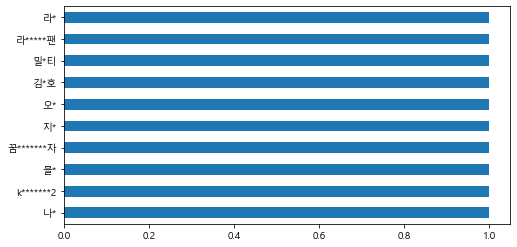

In [12]:
plt.barplot()
plt.title('카테고리 비율')
plt.show()

In [166]:
d1 = pd.DataFrame([ re_user['review_id'][0],re_user['review_rank'][0]],index = ['review_id','review_rank']).T
d1

,review_id,review_rank
0,2****a,5점
1,s*****y,1점
2,g*******7,1점
3,g*******g,4점
4,이****이,1점
5,k*******8,1점
6,a******9,2점
7,J*y,4점
8,블*,4점
9,y********7,2점


In [167]:
pd.merge(re[['isbn']].loc[0], d1, how='cross')

,0,review_id,review_rank
0,9791165341909,2****a,5점
1,9791165341909,s*****y,1점
2,9791165341909,g*******7,1점
3,9791165341909,g*******g,4점
4,9791165341909,이****이,1점
5,9791165341909,k*******8,1점
6,9791165341909,a******9,2점
7,9791165341909,J*y,4점
8,9791165341909,블*,4점
9,9791165341909,y********7,2점


In [179]:
isbn = []
for i in range(0,51384):
    try:
        for j in range(0,len(re_user['review_id'][i])):
            try:
                isbn_ = re_user['isbn'][]
                isbn.append(isbn_)
            except:
                pass
    except:
        pass

In [180]:
isbn

['9791165341909',
 '9791165341909',
 '9791165341909',
 '9791165341909',
 '9791165341909',
 '9791165341909',
 '9791165341909',
 '9791165341909',
 '9791165341909',
 '9791165341909',
 '9791161571188',
 '9791161571188',
 '9791161571188',
 '9791161571188',
 '9791161571188',
 '9791161571188',
 '9791161571188',
 '9791161571188',
 '9791161571188',
 '9791161571188',
 '9791192186313',
 '9788954681179',
 '9788954681179',
 '9788954681179',
 '9788954681179',
 '9788954681179',
 '9788954681179',
 '9788954681179',
 '9788954681179',
 '9788954681179',
 '9788954681179',
 '9791165343729',
 '9791165343729',
 '9791165343729',
 '9791165343729',
 '9791165343729',
 '9791165343729',
 '9791165343729',
 '9791165343729',
 '9791165343729',
 '9791165343729',
 '9791160946918',
 '9791160946918',
 '9791160946918',
 '9791160946918',
 '9791160946918',
 '9791160946918',
 '9791160946918',
 '9791160946918',
 '9791160946918',
 '9791160946918',
 '9791130677774',
 '9791130677774',
 '9791130677774',
 '9791130677774',
 '97911306

In [173]:
d3 = pd.DataFrame(columns = ['0', 'review_id','review_rank'])
for i in range(len(re)):
    d1 = pd.DataFrame([re_user['review_id'][i],re_user['review_rank'][i]],index = ['review_id','review_rank']).T
    d2 = pd.merge(left = re[['isbn']].loc[i], right = d1, how='cross')
    d3 = pd.concat([d3,d2],ignore_index=True)

KeyboardInterrupt: 

In [159]:
re[['isbn','title']].loc[0]

isbn                                    9791165341909
title    달러구트 꿈 백화점 (50만 부 기념 드림 에디션) - 주문하신 꿈은 매진입니다
Name: 0, dtype: object

In [67]:
df

,isbn,review_id,review_rank


In [143]:
re_user[['isbn','title']]

,isbn,title
0,9791165341909,달러구트 꿈 백화점 (50만 부 기념 드림 에디션) - 주문하신 꿈은 매진입니다
1,9791161571188,불편한 편의점 (40만부 기념 벚꽃 에디션)
2,9791192186313,시맨틱 에러 포토에세이
3,9788954681179,밝은 밤 (별밤 에디션)
4,9791165343729,달러구트 꿈 백화점 2 - 단골손님을 찾습니다
...,...,...
54369,9791192227726,[큰글씨책] 천직을 넘어 전설을 꿈꾸다 - 택시대학 정태성의 끝나지 않은 도전
54370,9791192227658,"[큰글씨책] 완벽한 소통법 - 일, 관계, 갈등이 술술 풀리는 커뮤니케이션의 법칙"
54371,9791164409464,희망을 모아 나누는 우리 - 농업 공동체 ‘해 뜨는 마을’ 이야기
54372,9791188519354,서번트 리더의 품격


In [149]:
dff = pd.DataFrame([re_user['isbn'][0], re_user['review_id'][0],re_user['review_rank'][0]], index = ['isbn','review_id','review_rank']).T
dff

,isbn,review_id,review_rank
0,9791165341909,"[2****a, s*****y, g*******7, g*******g, 이****이...","[5점, 1점, 1점, 4점, 1점, 1점, 2점, 4점, 4점, 2점]"


In [141]:
re_user['isbn'][0]

'9791165341909'